# How has Stephen Curry’s individual performance evolved throughout various NBA regular seasons, and what impact has it had on his team’s overall success?

Todd Ganbat

## Data Details

#### Question 1

How has Stephen Curry’s performance in NBA regular seasons changed over
time, and how does his individual performance influence his team’s
success?

#### Question 2

**Description of data’s origin**:

The dataset provided originates from Basketball-Reference.com, a
reputable source for basketball-related statistics and information. It
was curated specifically for educational purposes, with the intention of
facilitating learning and analysis within academic or instructional
contexts.

This dataset encompasses a comprehensive range of statistics pertaining
to the Golden State Warriors, a prominent team in the National
Basketball Association (NBA), as well as detailed metrics regarding the
individual performance of Stephen Curry, a distinguished player renowned
for his exceptional skills and contributions to the sport. The data
spans a substantial timeframe, covering the years from 2009 to 2024,
offering a rich and extensive resource for studying the performance
trends and dynamics within the NBA during this period.

It’s important to note that this dataset is not intended for commercial
or operational use, but rather for educational exploration and academic
inquiry. As such, it should be utilized with a focus on learning,
analysis, and research within appropriate educational or instructional
settings.

**Description of the files included with the data**:

-   Meta Data: The Description for each observation in the data set.
-   Read me: Text file that has information about license, data type
    (census, survey, etc.), date last updated, data limitations, data
    privacy or other ethical considerations.
-   Rmd file: The document that has the code and explanatory text about
    the dataset and its analysis.
-   R project file: R studio workplace serves as a container for this
    project’s code and explanatory text.

**Description of Data Privacy and Assumptions**:

The dataset sourced from Basketball-Reference.com serves as a valuable
resource for educational purposes, facilitating in-depth analysis and
exploration within academic or instructional contexts.

Privacy Guidelines & Ethical Considerations:

Educational Analysis: The data is intended for educational analysis,
allowing users to delve into various aspects of basketball statistics
and performance trends.

Non-Commercial Use: It is not to be used for commercial purposes or
operational activities but rather for academic exploration and research.

Ethical Considerations: Users are expected to adhere to ethical
standards and guidelines, ensuring the responsible and ethical use of
the data.

Attribution: Proper attribution to Basketball-Reference.com should be
provided whenever the dataset is utilized or referenced in academic or
research endeavors.

Assumptions:

Accuracy and Reliability: The dataset is assumed to be accurate and
reliable, sourced from a reputable platform known for providing
comprehensive and meticulously curated basketball statistics.

Scope and Coverage: The data covers statistics related to the Golden
State Warriors and Stephen Curry spanning from 2009 to 2024,
encompassing a diverse range of performance metrics.

Educational Intent: The dataset is assumed to be compiled with the
specific purpose of supporting educational initiatives, enabling
students and researchers to analyze and interpret basketball-related
data for learning and research purposes.

**Data Limitations**:

While the dataset sourced from Basketball-Reference.com offers valuable
insights into basketball statistics, it is essential to acknowledge
certain limitations that may impact its usability and interpretation:

Incomplete Coverage: The dataset may not capture every aspect of the
Golden State Warriors’ performance or Stephen Curry’s individual
contributions during the specified time period. Certain events, games,
or statistical nuances may not be fully represented, leading to
potential gaps in the analysis.

Data Quality: While efforts are made to ensure the accuracy and
reliability of the data, occasional discrepancies or errors may exist.
Users should exercise caution when interpreting the statistics and
cross-reference with other reliable sources whenever possible.

Scope of Metrics: The dataset primarily focuses on traditional
basketball statistics such as points, assists, rebounds, and shooting
percentages. It may lack coverage of more advanced metrics or contextual
factors that could provide a deeper understanding of player performance
and team dynamics.

Subjectivity in Interpretation: Interpretation of the data is subjective
and may vary based on individual perspectives or analytical
methodologies. Users should approach the analysis with an awareness of
potential biases and exercise critical judgment in drawing conclusions.

Temporal Considerations: The dataset covers a specific time frame from
2009 to 2024, and trends or patterns observed within this period may not
necessarily reflect long-term or future developments in basketball or
player performance.

External Factors: The performance of the Golden State Warriors and
Stephen Curry may be influenced by various external factors such as
injuries, coaching changes, opponent strength, and rule changes, which
may not be fully captured or accounted for in the dataset.

**Data Type**:

The data sourced from Basketball-Reference.com can be classified as
sports statistics data, which is a subset of observational data. This
type of data is collected through observation or measurement of natural
phenomena, in this case, basketball games and player performances. It
differs from traditional survey or census data, which involve systematic
data collection through structured questionnaires or population counts.

#### Question 3

I utilized a dataset consisting of:

-   Stephen Curry’s regular season statistics from 2009-2010 season to
    2023-2024 season (points, assists, rebounds, steals, blocks,
    turnovers, shooting percentages, etc.)
    [here](https://www.basketball-reference.com/players/c/curryst01.html).

-   The win/loss ratio of the Golden State Warriors spanning from the
    2009-2010 season to the 2023-2024 season
    [here](https://www.basketball-reference.com/teams/GSW/).

I gathered the data for this task by extracting it from
Basketball-Reference.com. Here’s how I obtained the data:

``` r
library(rvest)
library(tidyverse)
library(stringr)
library(dplyr)
library(ggplot2)

curry_url <- "https://www.basketball-reference.com/players/c/curryst01.html"

curry_data <- read_html(curry_url)

table_data <- curry_data %>%
  html_table(header = TRUE)

clean_data1 <- table_data[[2]]

clean_data1 <- clean_data1[-nrow(clean_data1), ]
colnames(clean_data1)[colnames(clean_data1) == "Season"] <- "Year"
```

Here’s how I retrieved the data for the Golden State Warriors:

``` r
gsw_url <- "https://www.basketball-reference.com/teams/GSW/"

gsw_data <- read_html(gsw_url)

table_data2 <- gsw_data %>%
  html_table(header = TRUE)

clean_data2 <- table_data2[[1]]

clean_data2 <- clean_data2 %>% select(Season, W, L, 'W/L%') 
clean_data2 <- clean_data2[order(clean_data2$Season), ]
clean_data2 <- clean_data2[64:78,]
```

Here’s how I created a function to correctly merge two tables:

``` r
colnames(clean_data2)[colnames(clean_data2) == "Season"] <- "Year"

clean_data1$Year <- as.character(clean_data1$Year)
clean_data2$Year <- as.character(clean_data2$Year)

clean_data_full <- full_join(clean_data1, clean_data2, by = "Year")
clean_data_full <- clean_data_full[1:15,]

colnames(clean_data_full)[colnames(clean_data_full) == "3P%"] <- "Threepoint_per"

colnames(clean_data_full)[colnames(clean_data_full) == "W/L%"] <- "Winloss_per"

colnames(clean_data_full)[colnames(clean_data_full) == "FG%"] <- "Fieldgoal_per"

colnames(clean_data_full)[colnames(clean_data_full) == "eFG%"] <- "Eff_fg_per"
```

I have chosen not to store the data locally since it’s small and can be
easily downloaded as long as an internet connection is available.

#### References

**rvest**: Wickham H (2024). *rvest: Easily Harvest (Scrape) Web Pages*.
R package version 1.0.4, <https://CRAN.R-project.org/package=rvest>.

**tidyverse**: Wickham H, Averick M, Bryan J, Chang W, McGowan LD,
François R, Grolemund G, Hayes A, Henry L, Hester J, Kuhn M, Pedersen
TL, Miller E, Bache SM, Müller K, Ooms J, Robinson D, Seidel DP, Spinu
V, Takahashi K, Vaughan D, Wilke C, Woo K, Yutani H (2019). “Welcome to
the tidyverse.” *Journal of Open Source Software*, *4*(43), 1686.
<doi:10.21105/joss.01686> <https://doi.org/10.21105/joss.01686>.

**stringr**: Wickham H (2023). *stringr: Simple, Consistent Wrappers for
Common String Operations*. R package version 1.5.1,
<https://CRAN.R-project.org/package=stringr>.

**dplyr**: Wickham H, François R, Henry L, Müller K, Vaughan D (2023).
*dplyr: A Grammar of Data Manipulation*. R package version 1.1.4,
<https://CRAN.R-project.org/package=dplyr>.

**ggplot2**: H. Wickham. ggplot2: Elegant Graphics for Data Analysis.
Springer-Verlag New York, 2016.

#### Additional Files

To access information regarding the data’s license, type (such as census
or survey), date of last update, any limitations associated with the
data, as well as considerations for data privacy, please consult the
**“read_me.txt”** file and the **“meta_data.csv”** file. These documents
provide detailed documentation and guidance on these important aspects
of the dataset.

## Blog post

### Who is Stephen Curry?

Stephen Curry is a professional basketball player known for his
exceptional shooting skills. And he happens to be one of my favorite
athletes! Curry plays as a point guard for the Golden State Warriors in
the NBA. He is renowned for revolutionizing the game with his
extraordinary three-point shooting ability, consistently making shots
from long distances with remarkable accuracy. His impressive
ball-handling and playmaking skills also make him a standout player.

Curry has won multiple NBA championships and has been named the league’s
Most Valuable Player (MVP) multiple times. Off the court, he is known
for his philanthropic efforts and engaging personality. His influence
extends beyond basketball, making him a global sports icon and a source
of inspiration for aspiring athletes. You can find more about his career
and achievements [here](https://en.wikipedia.org/wiki/Stephen_Curry).

In his career, Curry has set numerous records and continues to be a
dominant force in the NBA. His popularity has led to widespread
recognition, and he has become a key figure in promoting the sport of
basketball around the world.

### Why analyse Stephen Curry’s stats?

Many analysts are motivated by their passion for basketball and
dedication to understanding the game’s intricacies. For many, analyzing
Stephen Curry’s stats is a privilege and a fascinating challenge. Some
analysts focus on specific aspects, such as his shooting percentages
from various distances. The pool of analysts has also become far more
diverse as interest in advanced basketball metrics has grown and Curry’s
popularity has soared.

Since Stephen Curry is the unanimously greatest shooter the basketball
world has ever seen, I’m curious about understanding how Curry’s
performance and his offensive skillset impact the overall success of the
Golden State Warriors.

### Where can we get necessary data of Stephen Curry and his team?

The data for analyzing Stephen Curry’s stats can be gathered from
Basketball-Reference.com. The results are as follows.

``` r
library(kableExtra)

clean_data_full |>
  kbl() |>
  kable_styling()
```

| Year    | Age | Tm  | Lg  | Pos |   G |  GS |   MP |   FG |  FGA | Fieldgoal_per |  3P |  3PA | Threepoint_per |  2P |  2PA |   2P% | Eff_fg_per |  FT | FTA |   FT% | ORB | DRB | TRB | AST | STL | BLK | TOV |  PF |  PTS | Awards               |   W |   L | Winloss_per |
|:--------|----:|:----|:----|:----|----:|----:|-----:|-----:|-----:|--------------:|----:|-----:|---------------:|----:|-----:|------:|-----------:|----:|----:|------:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|:---------------------|----:|----:|------------:|
| 2009-10 |  21 | GSW | NBA | PG  |  80 |  77 | 36.2 |  6.6 | 14.3 |         0.462 | 2.1 |  4.8 |          0.437 | 4.5 |  9.5 | 0.474 |      0.535 | 2.2 | 2.5 | 0.885 | 0.6 | 3.9 | 4.5 | 5.9 | 1.9 | 0.2 | 3.0 | 3.2 | 17.5 | ROY-2                |  26 |  56 |       0.317 |
| 2010-11 |  22 | GSW | NBA | PG  |  74 |  74 | 33.6 |  6.8 | 14.2 |         0.480 | 2.0 |  4.6 |          0.442 | 4.8 |  9.6 | 0.498 |      0.551 | 2.9 | 3.1 | 0.934 | 0.7 | 3.2 | 3.9 | 5.8 | 1.5 | 0.3 | 3.1 | 3.1 | 18.6 |                      |  36 |  46 |       0.439 |
| 2011-12 |  23 | GSW | NBA | PG  |  26 |  23 | 28.2 |  5.6 | 11.4 |         0.490 | 2.1 |  4.7 |          0.455 | 3.5 |  6.7 | 0.514 |      0.583 | 1.5 | 1.8 | 0.809 | 0.6 | 2.8 | 3.4 | 5.3 | 1.5 | 0.3 | 2.5 | 2.4 | 14.7 |                      |  23 |  43 |       0.348 |
| 2012-13 |  24 | GSW | NBA | PG  |  78 |  78 | 38.2 |  8.0 | 17.8 |         0.451 | 3.5 |  7.7 |          0.453 | 4.5 | 10.1 | 0.449 |      0.549 | 3.4 | 3.7 | 0.900 | 0.8 | 3.3 | 4.0 | 6.9 | 1.6 | 0.2 | 3.1 | 2.5 | 22.9 | MVP-11,MIP-8         |  47 |  35 |       0.573 |
| 2013-14 |  25 | GSW | NBA | PG  |  78 |  78 | 36.5 |  8.4 | 17.7 |         0.471 | 3.3 |  7.9 |          0.424 | 5.0 |  9.8 | 0.509 |      0.566 | 3.9 | 4.5 | 0.885 | 0.6 | 3.7 | 4.3 | 8.5 | 1.6 | 0.2 | 3.8 | 2.5 | 24.0 | MVP-6,NBA2,AS        |  51 |  31 |       0.622 |
| 2014-15 |  26 | GSW | NBA | PG  |  80 |  80 | 32.7 |  8.2 | 16.8 |         0.487 | 3.6 |  8.1 |          0.443 | 4.6 |  8.7 | 0.528 |      0.594 | 3.9 | 4.2 | 0.914 | 0.7 | 3.6 | 4.3 | 7.7 | 2.0 | 0.2 | 3.1 | 2.0 | 23.8 | MVP-1,NBA1,AS        |  67 |  15 |       0.817 |
| 2015-16 |  27 | GSW | NBA | PG  |  79 |  79 | 34.2 | 10.2 | 20.2 |         0.504 | 5.1 | 11.2 |          0.454 | 5.1 |  9.0 | 0.566 |      0.630 | 4.6 | 5.1 | 0.908 | 0.9 | 4.6 | 5.4 | 6.7 | 2.1 | 0.2 | 3.3 | 2.0 | 30.1 | MVP-1,NBA1,AS,MIP-4  |  73 |   9 |       0.890 |
| 2016-17 |  28 | GSW | NBA | PG  |  79 |  79 | 33.4 |  8.5 | 18.3 |         0.468 | 4.1 | 10.0 |          0.411 | 4.4 |  8.3 | 0.537 |      0.580 | 4.1 | 4.6 | 0.898 | 0.8 | 3.7 | 4.5 | 6.6 | 1.8 | 0.2 | 3.0 | 2.3 | 25.3 | MVP-6,NBA2,AS        |  67 |  15 |       0.817 |
| 2017-18 |  29 | GSW | NBA | PG  |  51 |  51 | 32.0 |  8.4 | 16.9 |         0.495 | 4.2 |  9.8 |          0.423 | 4.2 |  7.1 | 0.595 |      0.618 | 5.5 | 5.9 | 0.921 | 0.7 | 4.4 | 5.1 | 6.1 | 1.6 | 0.2 | 3.0 | 2.2 | 26.4 | MVP-10,NBA3,AS       |  58 |  24 |       0.707 |
| 2018-19 |  30 | GSW | NBA | PG  |  69 |  69 | 33.8 |  9.2 | 19.4 |         0.472 | 5.1 | 11.7 |          0.437 | 4.0 |  7.7 | 0.525 |      0.604 | 3.8 | 4.2 | 0.916 | 0.7 | 4.7 | 5.3 | 5.2 | 1.3 | 0.4 | 2.8 | 2.4 | 27.3 | MVP-5,NBA1,AS        |  57 |  25 |       0.695 |
| 2019-20 |  31 | GSW | NBA | PG  |   5 |   5 | 27.8 |  6.6 | 16.4 |         0.402 | 2.4 |  9.8 |          0.245 | 4.2 |  6.6 | 0.636 |      0.476 | 5.2 | 5.2 | 1.000 | 0.8 | 4.4 | 5.2 | 6.6 | 1.0 | 0.4 | 3.2 | 2.2 | 20.8 |                      |  15 |  50 |       0.231 |
| 2020-21 |  32 | GSW | NBA | PG  |  63 |  63 | 34.2 | 10.4 | 21.7 |         0.482 | 5.3 | 12.7 |          0.421 | 5.1 |  9.0 | 0.569 |      0.605 | 5.7 | 6.3 | 0.916 | 0.5 | 5.0 | 5.5 | 5.8 | 1.2 | 0.1 | 3.4 | 1.9 | 32.0 | MVP-3,NBA1,AS        |  39 |  33 |       0.542 |
| 2021-22 |  33 | GSW | NBA | PG  |  64 |  64 | 34.5 |  8.4 | 19.1 |         0.437 | 4.5 | 11.7 |          0.380 | 3.9 |  7.4 | 0.527 |      0.554 | 4.3 | 4.7 | 0.923 | 0.5 | 4.7 | 5.2 | 6.3 | 1.3 | 0.4 | 3.2 | 2.0 | 25.5 | MVP-8,NBA2,AS        |  53 |  29 |       0.646 |
| 2022-23 |  34 | GSW | NBA | PG  |  56 |  56 | 34.7 | 10.0 | 20.2 |         0.493 | 4.9 | 11.4 |          0.427 | 5.1 |  8.8 | 0.579 |      0.614 | 4.6 | 5.0 | 0.915 | 0.7 | 5.4 | 6.1 | 6.3 | 0.9 | 0.4 | 3.2 | 2.1 | 29.4 | MVP-9,NBA2,AS,CPOY-9 |  44 |  38 |       0.537 |
| 2023-24 |  35 | GSW | NBA | PG  |  74 |  74 | 32.7 |  8.8 | 19.5 |         0.450 | 4.8 | 11.8 |          0.408 | 4.0 |  7.7 | 0.515 |      0.573 | 4.0 | 4.4 | 0.923 | 0.5 | 4.0 | 4.5 | 5.1 | 0.7 | 0.4 | 2.8 | 1.6 | 26.4 | NBA3,AS,CPOY-1       |  46 |  36 |       0.561 |

### What do the data reveal about Stephen Curry’s individual performance and its impact on his team’s success?

I chose certain questions about Stephen Curry’s Points Per Game Over the
Years, relationship between Stephen Curry’s Points Per Game and Team
Win-Loss Percentage, relationship between Stephen Curry’s Points Per
Game and Three Point Attempts. Analyzing such statistics can provide
valuable insights for several reasons as it displayed below.

**Performance Trends and Impact**:

By analyzing Curry’s points per game (PPG) over the years, you can
discern patterns in his performance. This analysis sheds light on his
development as a player, his ability to adapt his game over time, and
his consistency. Additionally, it reveals how his scoring averages have
correlated with the number of wins each season.

``` r
library(ggplot2)

ggplot(clean_data_full, aes(x = Year, y = PTS, label = W, color = W, group = 1)) +
  geom_line() +                  # Line plot
  geom_point() +                 # Points
  geom_text(nudge_y = 1) +       # Labels, nudge_y adjusts the vertical position
  scale_color_gradient(low = "red", high = "green") + # Color gradient for wins
  labs(title = "Stephen Curry's Points Per Game Over the Years",
       x = "Year",
       y = "Points Per Game",
       color = "Wins") +
  theme_bw()   
```

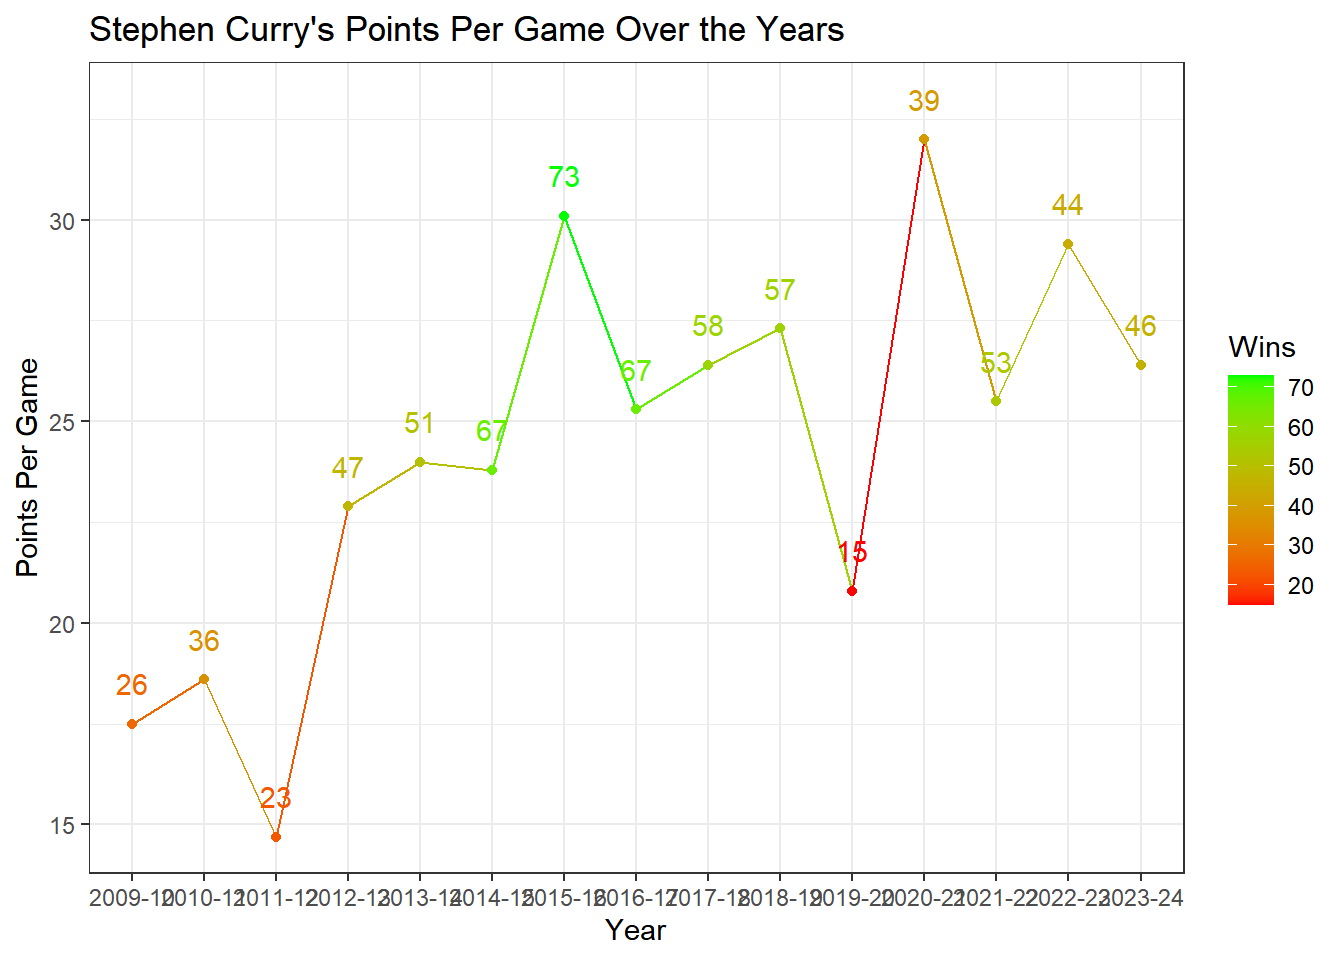

This result demonstrates the progression of Stephen Curry’s offensive
abilities over the years and the related annual team wins. It emphasizes
the ascent of his scoring performance to elite levels. While this
enhancement has greatly contributed to his personal success on the
basketball court, it has also translated into more team wins in most
years. Other than that, we can also see there are two exceptional
outliers during the 2011-12 and 2019-2020 seasons, attributable to
Curry’s injuries during those periods.

**Impact on Team Success**:

This analysis can reveal how Curry’s scoring influences the overall
success of his team.

``` r
correlation <- cor(clean_data_full$Winloss_per, clean_data_full$PTS)

ggplot(clean_data_full, aes(x = Winloss_per, y = PTS)) +
  geom_point(color = "black") +
  geom_smooth(method = "lm", se = FALSE, color = "green") +  # Add correlation line
  labs(title = "Stephen Curry's Points Per Game vs Team Win-Loss Percentage",
       x = "Win-Loss Percentage",
       y = "Points Per Game") +
  annotate("text", x = max(clean_data_full$Winloss_per), y = min(clean_data_full$PTS), 
           label = paste("Correlation coefficient:", round(correlation, 2)), hjust = 1, vjust = 0) +
  theme_bw()
```

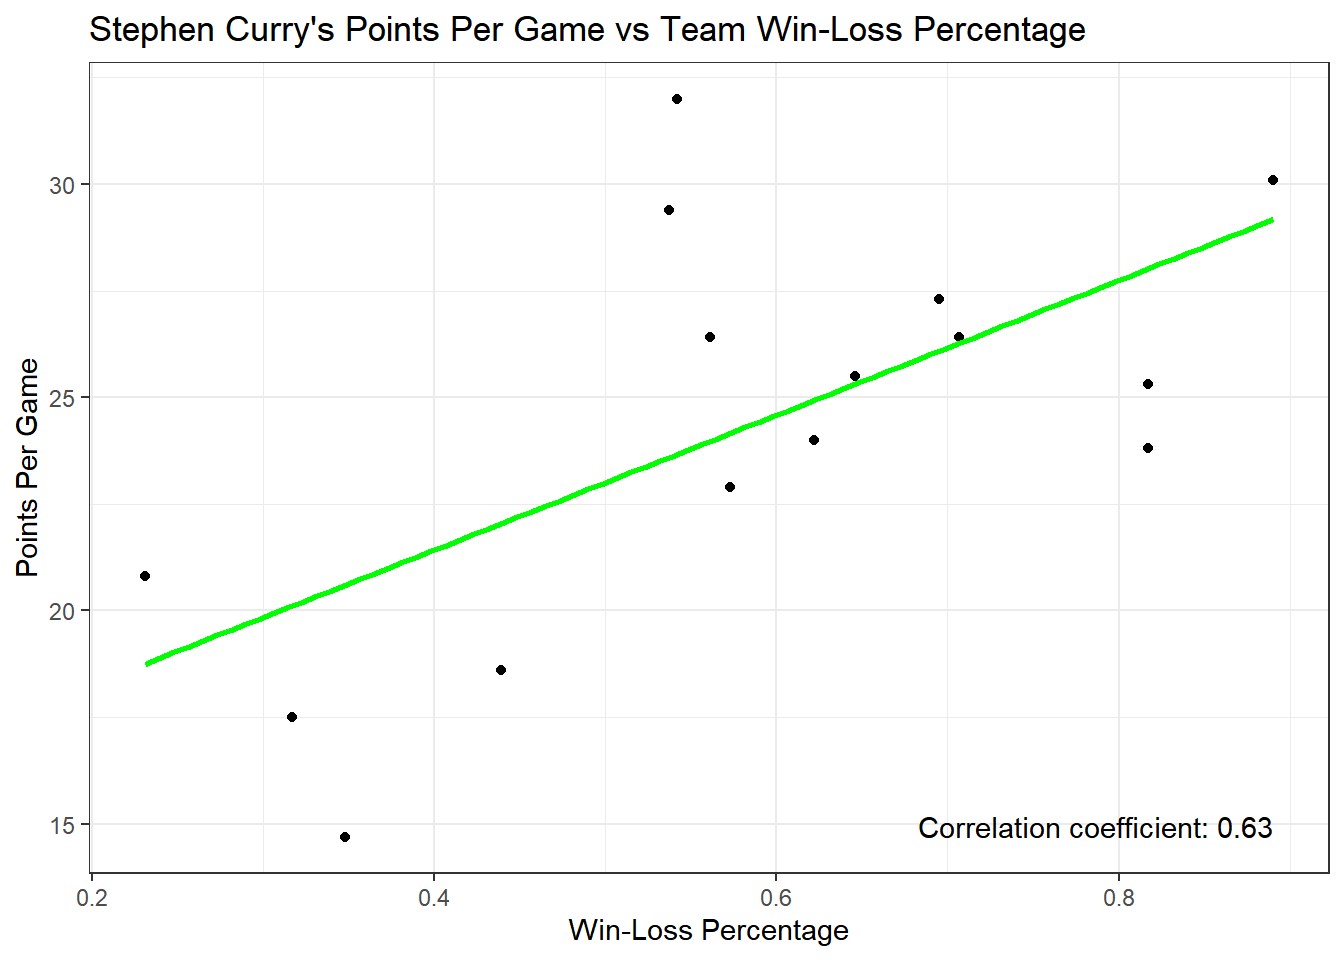

This outcome highlights a significant correlation, suggesting that his
scoring plays a pivotal role in the team’s successes. Understanding this
relationship can be invaluable for devising game strategies and gaining
insights into his role within the team. Additionally, there are couple
of outliers in this dataset, attributable to either shortened seasons or
periods of Curry’s injury.

**Shooting Efficiency**:

By analyzing the relationship between his PPG and his three-point
attempts, you can assess his shooting efficiency and the impact of his
three-point shooting on his overall scoring. This can provide insights
into his scoring methods and highlight the importance of his elite
three-point shooting ability in his scoring arsenal.

``` r
ggplot(clean_data_full, aes(x = `3PA`, y = PTS)) +
  geom_point(color = "black") +
  geom_smooth(method = "lm", se = FALSE, color = "green") +  # Add correlation line
  labs(title = "Stephen Curry's Points Per Game vs Three Point Attempts",
       x = "Three Point Attempts",
       y = "Points Per Game") +
  annotate("text", x = max(clean_data_full$`3PA`), y = min(clean_data_full$PTS), 
           label = paste("Correlation coefficient:", round(cor(clean_data_full$`3PA`, clean_data_full$PTS), 2)), hjust = 1, vjust = 0) +
    theme_bw()
```

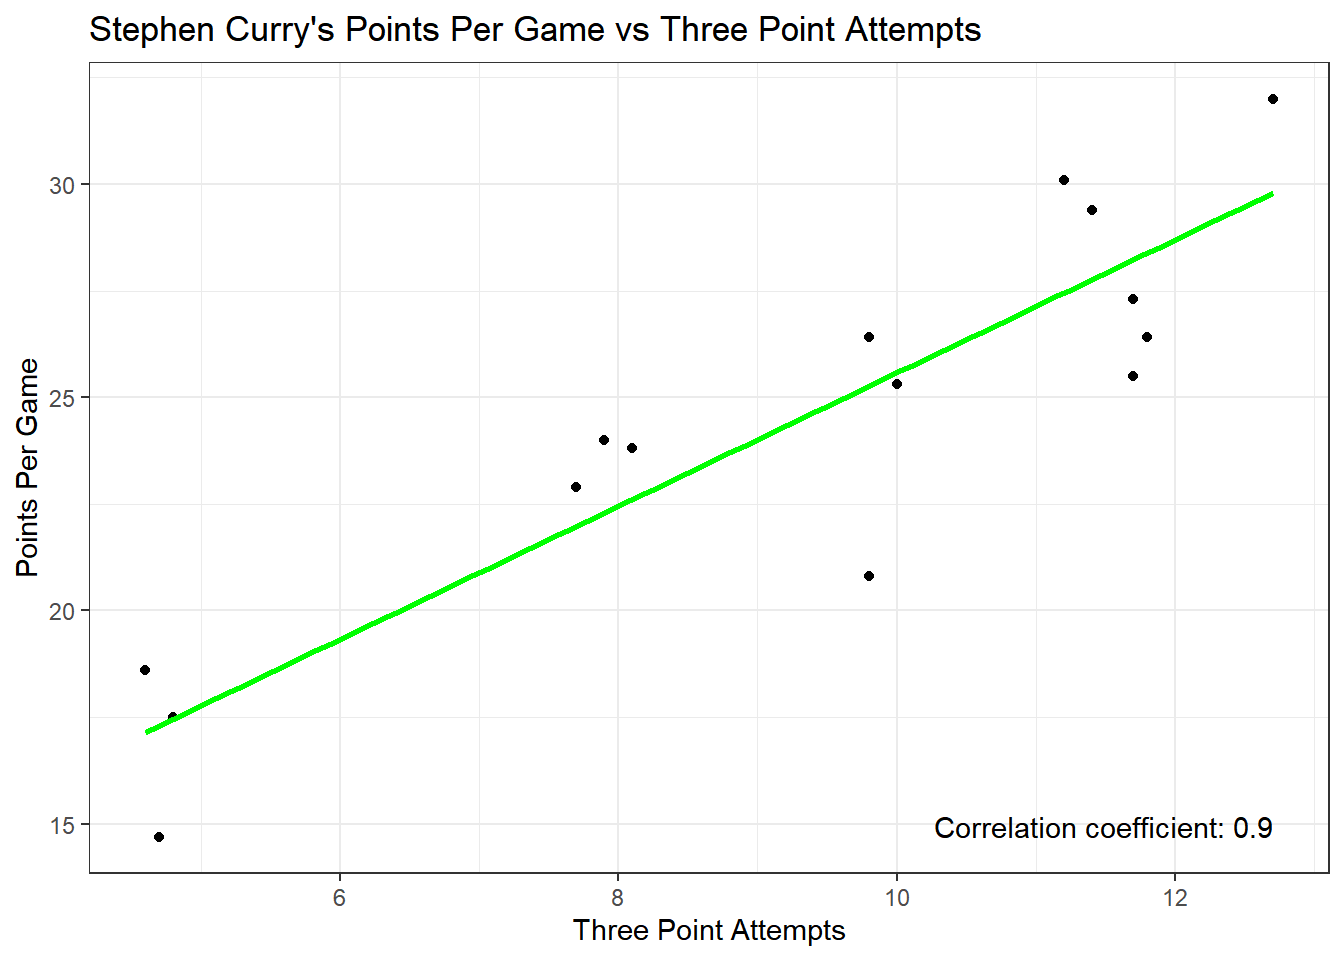

This outcome demonstrates a clear relationship: as Stephen Curry’s
three-point attempts rise, his scoring average directly follows suit.
Building upon our earlier observation of how his scoring average impacts
his team’s success, this current insight underscores the pivotal role of
three-point attempts in shaping his scoring average. The correlation
coefficient of 0.9 solidifies this conclusion, indicating a strong
positive correlation between these variables. Additionally, there are
couple of outliers in this dataset, attributable to either shortened
seasons or periods of Curry’s injury.

### What else could we learn from the analysis?

While examining regular stat lines such as points, shooting percentages,
and wins is valuable, delving into advanced statistics like box
plus-minus and usage rate can provide deeper insights. I’d like to
analyze Stephen Curry’s impact not only on the Golden State Warriors but
also on the entire NBA. Specifically, I’d explore:

-   The increase in three-point shot attempts by NBA players since Curry
    entered the league.
-   The overall performance of the Golden State Warriors without Stephen
    Curry.
-   A comparison of Curry’s box plus-minus and usage rate with those of
    all-time great players throughout NBA history.

### References

**Basketball-Reference.com** (2024). *Stephen Curry*.
<https://www.basketball-reference.com/players/c/curryst01.html>.

**Basketball-Reference.com** (2024). *Golden State Warriors*.
<https://www.basketball-reference.com/players/c/curryst01.html>.

**Zhu H** (2024). *kableExtra: Construct Complex Table with ‘kable’ and
Pipe Syntax*. R package version 1.4.0,
<https://CRAN.R-project.org/package=kableExtra>.

## Behind the Scenes

#### Question 4

*Tell us about a part(s) of your data processing or analysis that
weren’t “sexy” and wouldn’t typically be included in a blog post.
(e.g. Was their any data drudgery or time intensive wrangling? Were
there any repetitive tasks or manual tasks? If it was easy, describe
what made it easy?)*

Consolidating the data into a uniform format was a challenging endeavor,
but it significantly reduced the need for manual handling, streamlining
the overall process. Furthermore, optimizing the presentation of each
chart demanded a concerted effort, as ensuring clarity and effectiveness
in visual communication required meticulous attention to detail and
thoughtful design adjustments.

#### Question 5

*Were there any challenges that you faced in conducting this analysis.
These may take the form of data limitations or coding challenges?
(e.g. Was there anything in your analysis that you were not anticipating
when you started? Did you have to change your intended scope?)*

Including certain types of individual statistics posed challenges, so I
opted not to include them, as the primary focus was on Stephen Curry’s
individual performance and its impact on the team. While I was eager to
delve into each type of statistic, doing so might have complicated the
analysis or strayed from the main context. Therefore, I focused on key
metrics such as overall team wins, win-loss percentage, points per game,
and three-point percentage.

As for the time-intensive data wrangling, merging the team and player
stat lines was not overly difficult. However, some rows required
cleaning to ensure successful merging and preparation of the final
dataset for analysis.

#### Questions 6

*Tell us about any imperfect parts of your work or how would like to
expand this analysis in future? (We don’t expect you to solve everything
in one assignment.)*

Beyond the conventional statistics like points scored, shooting
accuracy, and team wins, there lies a wealth of insights in advanced
metrics such as box plus-minus, usage rate and many more. These metrics
offer a nuanced understanding of a player’s impact on both individual
games and overall team performance.

For my future analysis, I aim to delve into Stephen Curry’s influence,
not only within the Golden State Warriors but across the broader NBA
landscape. Specifically, I intend to explore several key areas:

-   The Evolution of Three-Point Shooting: Since Curry’s entry into the
    league, there has been a noticeable uptick in three-point shot
    attempts by NBA players. By examining trends over time, I seek to
    uncover the extent of Curry’s influence on the league’s playing
    style and strategic emphasis on long-range shooting.

-   Warriors’ Performance Sans Curry: Beyond his individual
    contributions, I will scrutinize the Golden State Warriors’
    performance in games where Curry was absent. This analysis will shed
    light on Curry’s importance to the team’s success and highlight any
    discernible differences in their gameplay and outcomes in his
    absence.

-   Comparative Analysis of Advanced Metrics: To contextualize Curry’s
    impact within the pantheon of basketball greats, I plan to compare
    his box plus-minus and usage rate with those of historical NBA
    legends. By comparing Curry’s metrics against players renowned for
    their dominance and influence, we can better appreciate his unique
    standing in the annals of basketball history.